In [1]:
!git -C ColBERT/ pull || git clone https://github.com/whoismuch/ColBERT.git
import sys; sys.path.insert(0, 'ColBERT/')

fatal: cannot change to 'ColBERT/': No such file or directory
Cloning into 'ColBERT'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 246 (delta 48), reused 235 (delta 37), pack-reused 0
Receiving objects: 100% (246/246), 6.46 MiB | 11.86 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [2]:

try: # When on google Colab, let's install all dependencies with pip.
    import google.colab
    !pip install -U pip
    !pip install -e ColBERT/['faiss-gpu','torch']
    !mkdir ./Training
except Exception:
  import sys; sys.path.insert(0, 'ColBERT/')
  try:
    from colbert import Indexer, Searcher
  except Exception:
    print("If you're running outside Colab, please make sure you install ColBERT in conda following the instructions in our README. You can also install (as above) with pip but it may install slower or less stable faiss or torch dependencies. Conda is recommended.")
    assert False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Obtaining file:///content/ColBERT
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.0

In [3]:
import torch
torch.cuda.empty_cache()

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
triples = '/content/drive/MyDrive/examples_74960.json'
queries='/content/drive/MyDrive/queries.train.tsv'
collection='/content/drive/MyDrive/collection_1gb.tsv'

In [ ]:
import IndSearcher

In [ ]:
documents = ["This is a test document.", "Another document for testing."]
colbert_model = IndSearcher('colbert/')
faiss_index, document_embeddings = colbert_model.index_documents_with_faiss(documents, colbert_model)
query = "test document"
top_k_indices, top_k_distances = colbert_model.search_with_faiss(query, colbert_model, faiss_index, document_embeddings, top_k=2)


In [7]:
checkpoint = 'bert-base-multilingual-cased'

In [8]:
import torch
torch.cuda.empty_cache()

In [9]:
from colbert.infra import Run, RunConfig, ColBERTConfig
from colbert import Trainer
from colbert.training.training import train
import matplotlib.pyplot as plt


if __name__=='__main__':
  with Run().context(RunConfig(nranks=1, experiment="train")):

      config = ColBERTConfig(
          bsize=16,
          root="/content/Training",
          checkpoint=checkpoint,
          nway = 4
      )

      checkpoint_path, losses = train(
          triples=triples,
          queries=queries,
          collection=collection,
          config=config
      )



{
    "query_token_id": "[unused0]",
    "doc_token_id": "[unused1]",
    "query_token": "[Q]",
    "doc_token": "[D]",
    "ncells": null,
    "centroid_score_threshold": null,
    "ndocs": null,
    "load_index_with_mmap": false,
    "index_path": null,
    "index_bsize": 64,
    "nbits": 1,
    "kmeans_niters": 4,
    "resume": false,
    "similarity": "cosine",
    "bsize": 16,
    "accumsteps": 1,
    "lr": 3e-6,
    "maxsteps": 500000,
    "save_every": null,
    "warmup": null,
    "warmup_bert": null,
    "relu": false,
    "nway": 4,
    "use_ib_negatives": false,
    "reranker": false,
    "distillation_alpha": 1.0,
    "ignore_scores": false,
    "model_name": null,
    "query_maxlen": 32,
    "attend_to_mask_tokens": false,
    "interaction": "colbert",
    "dim": 128,
    "doc_maxlen": 220,
    "mask_punctuation": true,
    "checkpoint": "bert-base-multilingual-cased",
    "triples": null,
    "collection": null,
    "queries": null,
    "index_name": null,
    "overwrite"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

[May 24, 20:25:52] #> Loading the queries from /content/drive/MyDrive/queries.train.tsv ...
[May 24, 20:25:53] #> Got 241379 queries. All QIDs are unique.

[May 24, 20:25:53] #> Loading collection...
0M 1M 2M 3M 


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of HF_ColBERT were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['linear.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
[May 24, 20:55:43] 2186 0.7629060809010814
#>>>    20.11 19.19 		|		 0.9199999999999982
[May 24, 20:55:44] 2187 0.7627002706458524
#>>>    20.27 19.06 		|		 1.2100000000000009
[May 24, 20:55:45] 2188 0.7623485105156924
#>>>    20.13 19.31 		|		 0.8200000000000003
[May 24, 20:55:45] 2189 0.7623168706042672
#>>>    20.03 19.58 		|		 0.45000000000000284
[May 24, 20:55:46] 2190 0.7622451809509557
#>>>    21.23 19.67 		|		 1.5599999999999987
[May 24, 20:55:47] 2191 0.7619343667463957
#>>>    20.0 19.76 		|		 0.23999999999999844
[May 24, 20:55:47] 2192 0.7619595541524153
#>>>    20.2 19.16 		|		 1.0399999999999991
[May 24, 20:55:48] 2193 0.7620663810524637
#>>>    20.12 18.62 		|		 1.5
[May 24, 20:55:49] 2194 0.7619263140543839
#>>>    20.27 20.2 		|		 0.07000000000000028
[May 24, 20:55:50] 2195 0.7618477026001966
#>>>    20.48 19.17 		|		 1.3099999999999987
[May 24, 20:55:51] 2196 0.7617099295950909
#>>>    19.86 19.39 		|	

In [10]:
!cp -r /content/experiments/ /content/drive/MyDrive/

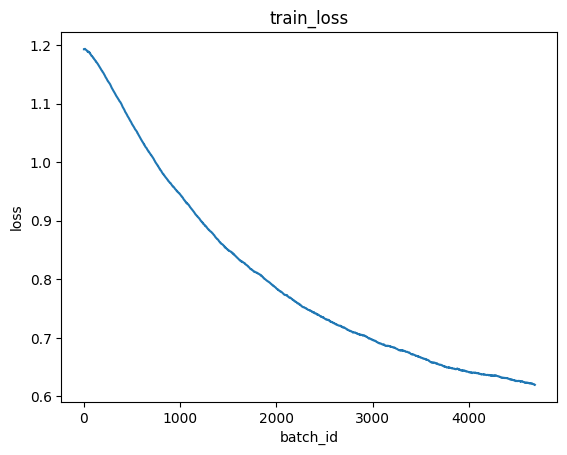

In [11]:
plt.plot(losses)

plt.title('train_loss')
plt.xlabel('batch_id')
plt.ylabel('loss')

plt.show()

In [12]:
checkpoint_path

'/content/experiments/train/none/2024-05/24/20.25.41/checkpoints/colbert'

In [13]:
!cp -r /content/experiments/ /content/drive/MyDrive

In [14]:
from colbert.infra import Run, RunConfig, ColBERTConfig
from colbert.data import Queries, Collection
from colbert import Indexer, Searcher

In [ ]:
nbits = 2   #  количество бит, используемых для кодирования каждого измерения вектора при создании индекса
doc_maxlen = 300 # обрезаем максимальную длину документов (в токенах)
index_name = f'ind500'

with Run().context(RunConfig(nranks=1, experiment='notebook')):  # nranks specifies the number of GPUs to use
    config = ColBERTConfig(doc_maxlen=doc_maxlen, nbits=nbits, kmeans_niters=4) # kmeans_niters specifies the number of iterations of k-means clustering; 4 is a good and fast default.
                                                                                # Consider larger numbers for small datasets.

    indexer = Indexer(checkpoint=checkpoint_path, config=config)
    indexer.index(name=index_name, collection=collection, overwrite=True)



[May 24, 14:32:50] #> Creating directory /content/experiments/notebook/indexes/ind500 


#> Starting...
#> Joined...


In [ ]:
indexer.get_index()

'/content/experiments/notebook/indexes/ind2bits'

In [ ]:
with Run().context(RunConfig(experiment='notebook')):
    searcher = Searcher(index=index_name, collection=collection)

[May 24, 14:36:41] #> Loading codec...
[May 24, 14:36:41] #> Loading IVF...
[May 24, 14:36:41] #> Loading doclens...


100%|██████████| 1/1 [00:00<00:00, 771.58it/s]

[May 24, 14:36:41] #> Loading codes and residuals...



100%|██████████| 1/1 [00:00<00:00, 23.10it/s]


In [ ]:
query = 'what is The Manhattan Project'
print(f"#> {query}")

# Find the top-3 passages for this query
results = searcher.search(query, k=3)

# Print out the top-k retrieved passages
for passage_id, passage_rank, passage_score in zip(*results):
    print(f"\t [{passage_rank}] \t\t {passage_score:.1f} \t\t {searcher.collection[passage_id]}")

#> what is The Manhattan Project

#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: . what is The Manhattan Project, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([  101,   100, 12976, 10124, 10117, 23115, 14300,   102,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

	 [1] 		 22.5 		 Essay on The Manhattan Project - The Manhattan Project The Manhattan Project was to see if making an atomic bomb possible. The success of this project would forever change the world forever making it known that something this powerful can be manmade.
	 [2] 		 22.2 		 The Rise of Industrial America, 1877-1900. When in 1873 Mark Twain and Char

In [ ]:
query = 'tell me about medicine in Costa Rica'
print(f"#> {query}")

# Find the top-3 passages for this query
results = searcher.search(query, k=3)

# Print out the top-k retrieved passages
for passage_id, passage_rank, passage_score in zip(*results):
    print(f"\t [{passage_rank}] \t\t {passage_score:.1f} \t\t {searcher.collection[passage_id]}")

#> tell me about medicine in Costa Rica
	 [1] 		 20.5 		 In an era of rising health care costs and decreased medical coverage, the concept of combining surgery with travel has taken off. The last decade has seen a boom in the health tourism sector in Costa Rica, especially in the area of plastic surgery.
	 [2] 		 20.2 		 Cost of Medical Treatment in Costa Rica. The following are cost comparisons between Medical procedures in Costa Rica and equivalent procedures in the United States: [sources: 1,2]
	 [3] 		 20.0 		 Medical Tours Costa Rica difference: At MTCR, our aim is to become your âone-stop shopâ for health care services, so we have put together packages with you, the medical tourist, in mind, offering a wide variety of specialties.


In [ ]:
query = 'who is Steve Wheeler'
print(f"#> {query}")

# Find the top-3 passages for this query
results = searcher.search(query, k=3)

# Print out the top-k retrieved passages
for passage_id, passage_rank, passage_score in zip(*results):
    print(f"\t [{passage_rank}] \t\t {passage_score:.1f} \t\t {searcher.collection[passage_id]}")

#> who is Steve Wheeler
	 [1] 		 20.5 		 He holds a Bachelor of Arts degree in American Legal and Constitutional History from the University of Minnesota where he was a member of Phi Beta Kappa. Steve is also a proud veteran who served in the U.S. Army and U.S. Army Reserves. Â©2017 Lendmark Financial Services, LLC. Steve was named Chief Credit Officer of Lendmark Financial Services, LLC in January 2016. In his current role, Steve oversees the credit philosophy and manages both the short and long-term credit strategy for Lendmark.
	 [2] 		 20.4 		 (1841 - 1904) Contrary to legend, AntonÃ­n DvoÅÃ¡k (September 8, 1841 - May 1, 1904) was not born in poverty. His father was an innkeeper and butcher, as well as an amateur musician. The father not only put no obstacles in the way of his son's pursuit of a musical career, he and his wife positively encouraged the boy.
	 [3] 		 20.2 		 Steve Wheeler was recently named Chief Credit Officer for Lendmark Financial Services, LLC. Click to learn m

In [ ]:
query = 'recommend me a fruit'
print(f"#> {query}")

# Find the top-3 passages for this query
results = searcher.search(query, k=3)

# Print out the top-k retrieved passages
for passage_id, passage_rank, passage_score in zip(*results):
    print(f"\t [{passage_rank}] \t\t {passage_score:.1f} \t\t {searcher.collection[passage_id]}")

#> recommend me a fruit

#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: . recommend me a fruit, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([   101,    100,  11639,  22530, 101480,  10911,    169,  31595,    102,
           103,    103,    103,    103,    103,    103,    103,    103,    103,
           103,    103,    103,    103,    103,    103,    103,    103,    103,
           103,    103,    103,    103,    103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

	 [1] 		 19.6 		 Buko Pandan is a popular Filipino Dessert; this is made using young coconut and Screwpine leaves (locally known as âPandanâ). At first glance, this sumptuous dessert can be mistaken for Buko Salad because of the similarity in texture and dairy ingredients used.
	 [2] 		 19.6 		 Itâs a common appetizer (correctly called AN